In [1]:
# Implementation of 3 experimental designs:
## 1. Latin hypercube 
## 2. Grid 
## 3. Uniform design

''' 
Installation: pip install --upgrade pyDOE
https://pythonhosted.org/pyDOE/randomized.html

import sys
!{sys.executable} -m pip install --upgrade pyDOE

'''

In [1]:
# Python imports 

import numpy as np
from matplotlib import pyplot as plt
import pyDOE as pyDOE

In [2]:
# Input parameters 

num_para = [3, 4, 5, 6, 7][0]
grid_evals = np.array([2, 3, 4, 5, 6, 7, 8])[6]
num_evals = grid_evals**num_para  ## Total number of evaluations for training the emulator (based on grid)
# num_evals = np.array([10, 100, 1000, 10000])[1]  ## Total number of evaluations (applicable for lhc and random)
design_all = ['latin', 'random', 'grid']

In [3]:
WithRange = False

if WithRange:
    #### Parameters -- replace this and the limits #####
    ####  para = np.linspace(lower_lim, upper_lim, total_eval)

    gridpara1 = np.linspace(0.0, 0.62036, grid_evals)  #OmegaM
    gridpara2 = np.linspace(0.1841, 0.4159, grid_evals) #Omegab
    gridpara3 = np.linspace(1.2886, 2.9114, grid_evals) # sigma8

    allGrid = np.vstack([gridpara1, gridpara2, gridpara3])

    para1 = np.linspace(0.0, 0.62036, num_evals)  #OmegaM
    para2 = np.linspace(0.1841, 0.4159, num_evals) #Omegab
    para3 = np.linspace(1.2886, 2.9114, num_evals) # sigma8

    allPara = np.vstack([para1, para2, para3])


else: 
    ### Samples between 0-1 and rescaling will be taken care of later
    allPara = np.linspace



In [4]:
def gridDesign(allGridParams, paramOutfile):
    ## NEEDS TO BE CHANGED BASED ON num_para
    grd = np.array(np.meshgrid(allGridParams[0], allGridParams[1], allGridParams[2]) )
    
    allCombinations = np.vstack( [np.ravel(grd[0]), np.ravel(grd[1]), np.ravel(grd[2])] ).T

    np.savetxt(paramOutfile, allCombinations)
    return allCombinations     

In [5]:
def latinHyp(allParams, paramOutfile):
    np.random.seed(421)
    lhd = pyDOE.lhs(allParams.shape[0], samples=num_evals, criterion=None) # c cm corr m
    # lhd = norm(loc=0, scale=1).ppf(lhd)  # this applies to both factors here
    idx = (lhd * num_evals).astype(int)

    allCombinations = np.zeros((num_evals, allParams.shape[0]))
    for i in range(allParams.shape[0]):
        allCombinations[:, i] = allParams[i][idx[:, i]]

    np.savetxt(paramOutfile, allCombinations)
    return allCombinations, lhd

In [6]:
def randomDesign(allParams, paramOutfile):
    ## CHECK if it's uniform in every direction
    np.random.seed(313)
    rnd = np.random.uniform(0, 1, (num_evals, allParams.shape[0]) )
    
    idx = (rnd * num_evals).astype(int)
    
    allCombinations = np.zeros((num_evals, allParams.shape[0]))
    for i in range(allParams.shape[0]):
        allCombinations[:, i] = allParams[i][idx[:, i]]

    np.savetxt(paramOutfile, allCombinations)
    return allCombinations, rnd

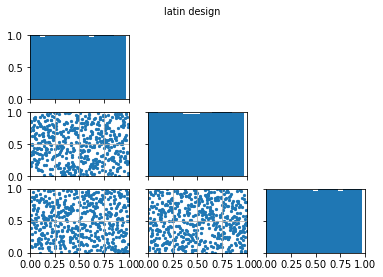

In [7]:
design = design_all[0]   
        
Outfile = design + '_para' + str(num_para) + '_total' + str(num_evals)
lhdParams, lhd = latinHyp(allPara,  'Designs/' + Outfile + '.txt' )
        
    
##
f, a = plt.subplots(allPara.shape[0], allPara.shape[0], sharex=True, sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.rcParams.update({'font.size': 8})
plt.suptitle(design + ' design')
for i in range(allPara.shape[0]):
    for j in range(i+1):
#         print(i,j)
        if(i>j):
            a[i, j].scatter(lhd[:, i], lhd[:, j], s=5)
            a[i, j].grid(True)
            
        if(j<i):
            plt.delaxes(a[j, i])
        else:
            # a[i,i].set_title(AllLabels[i])
            # a[i, i].text(0.4, 0.4, AllLabels[i], size = 'xx-large')
            hist, bin_edges = np.histogram(lhd[:,i], density=True, bins=8)
            # a[i,i].bar(hist)
            a[i,i].bar(bin_edges[:-1], hist/hist.max(), width=0.2)
            plt.xlim(0,1)
            plt.ylim(0,1)


plt.savefig('Plots/' + Outfile + '.png', figsize=(10, 10))
plt.show()

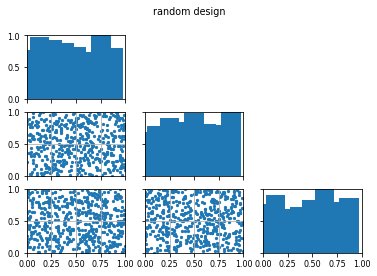

In [8]:
design = design_all[1]
        
Outfile = design + '_para' + str(num_para) + '_total' + str(num_evals)
rndParams, rnd = randomDesign(allPara,  'Designs/' + Outfile + '.txt' )

##
f, a = plt.subplots(allPara.shape[0], allPara.shape[0], sharex=True, sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.rcParams.update({'font.size': 8})
plt.suptitle(design + ' design')
for i in range(allPara.shape[0]):
    for j in range(i+1):
#         print(i,j)
        if(i>j):
            a[i, j].scatter(rnd[:, i], rnd[:, j], s=5)
            a[i, j].grid(True)
        if(j<i):
            plt.delaxes(a[j, i])
        else:
            # a[i,i].set_title(AllLabels[i])
            # a[i, i].text(0.4, 0.4, AllLabels[i], size = 'xx-large')
            hist, bin_edges = np.histogram(rnd[:,i], density=True, bins=8)
            # a[i,i].bar(hist)
            a[i,i].bar(bin_edges[:-1], hist/hist.max(), width=0.2)
            plt.xlim(0,1)
            plt.ylim(0,1)
            


plt.savefig('Plots/' + Outfile + '.png', figsize=(10, 10))
plt.show()

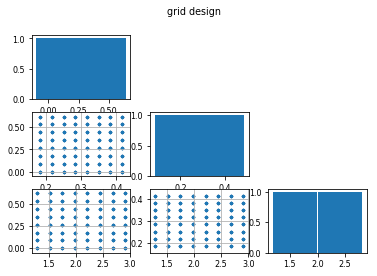

In [10]:
design = design_all[2]

        
Outfile = design + '_para' + str(num_para) + '_total' + str(num_evals)
gridParams = gridDesign(allGrid,  'Designs/' + Outfile + '.txt' )

##
f, a = plt.subplots(allGrid.shape[0], allGrid.shape[0])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.rcParams.update({'font.size': 8})
plt.suptitle(design + ' design')
for i in range(allGrid.shape[0]):
    for j in range(i+1):
#         print(i,j)
        if(i>j):
            a[i, j].scatter(gridParams[:, i], gridParams[:, j], s=5)
            a[i, j].grid(True)
        if(j<i):
            plt.delaxes(a[j, i])
        else:
            # a[i,i].set_title(AllLabels[i])
            # a[i, i].text(0.4, 0.4, AllLabels[i], size = 'xx-large')
            hist, bin_edges = np.histogram(gridParams[:, i], density=True, bins=8)
            # a[i,i].bar(hist)
            a[i,i].bar(bin_edges[:-1], hist/hist.max(), width=0.2)

## Plot looks like 9 points, but they're are coincided on the grids
plt.savefig('Plots/' + Outfile + '.png', figsize=(10, 10))
plt.show()

In [11]:
gridParams.shape

(512, 3)

In [12]:
lhdParams.shape

(512, 3)

In [13]:
rndParams.shape

(512, 3)